## 공통 코드

In [1]:
import sys
# sklearn ≥0.20 필수
import sklearn
# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os
# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)
# 깔끔한 그래프 출력을 위해 %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import platform
from matplotlib import font_manager, rc
#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "clustering"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

### 반달 모양의 데이터 군집

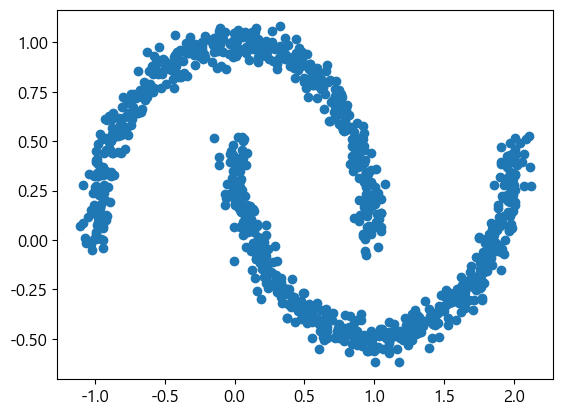

In [2]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

# print(X)
plt.scatter(x = X[:, 0], y = X[:, 1])

In [4]:
# eps 을 0.05, min_samples = 5 로 설정해서 DBSCAN 수행
from sklearn.cluster import DBSCAN

# 모델 생성 및 훈련
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

# 군집된 결과 확인 - (-1)은 잡음 포인트
print(dbscan.labels_[:20])

[ 0  2 -1 -1  1  0  0  0  2  5  2  3  0  2  2  2  4  2  2  4]


In [9]:
#핵심 샘플의 인덱스 개수 확인
print(len(dbscan.core_sample_indices_))
#핵심 샘플 확인
# print(dbscan.core_sample_indices_)
#핵심 샘플 자체의 값 출력
print(dbscan.components_)
#클러스터 확인
print(np.unique(dbscan.labels_))

808
[[-0.02137124  0.40618608]
 [-0.84192557  0.53058695]
 [ 0.58930337 -0.32137599]
 ...
 [ 1.66258462 -0.3079193 ]
 [-0.94355873  0.3278936 ]
 [ 0.79419406  0.60777171]]
[-1  0  1  2  3  4  5  6]


In [10]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

# 군집된 결과 확인 - (-1)은 잡음 포인트
print(dbscan.labels_[:20])

#핵심 샘플의 인덱스 개수 확인
print(len(dbscan.core_sample_indices_))

#핵심 샘플 자체의 값 출력
print(dbscan.components_)

#클러스터 확인
print(np.unique(dbscan.labels_))

[0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1]
1000
[[-0.02137124  0.40618608]
 [ 0.97670045 -0.45832306]
 [ 0.90405882 -0.37651952]
 ...
 [ 1.66258462 -0.3079193 ]
 [-0.94355873  0.3278936 ]
 [ 0.79419406  0.60777171]]
[0 1]


### DBSCAN 군집 결과 시각화

In [13]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    # 데이터 개수 만큼의 배열을 만들고 핵심 포인트이면 True 설정
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True

    # 이상치는 반대로 설정
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)
    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    plt.scatter(cores[:, 0], cores[:, 1], c=dbscan.labels_[core_mask], 
                marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*',
                s=20, c=dbscan.labels_[core_mask])  
    plt.scatter(anomalies[:, 0], anomalies[:, 1], 
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], 
                c=dbscan.labels_[non_core_mask], marker=".")
    
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
        plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

In [11]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

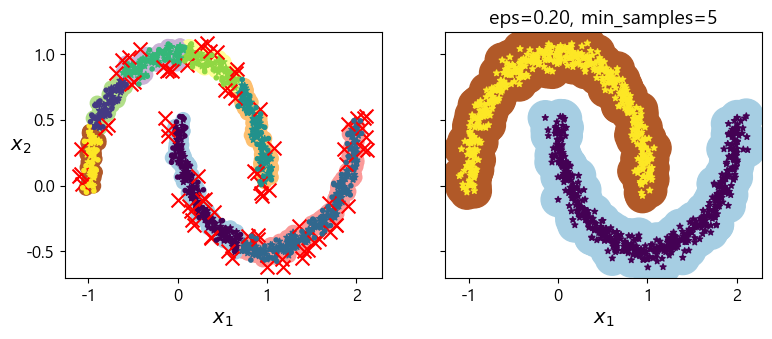

In [14]:
plt.figure(figsize=(9, 3.2))
plt.subplot(121)
plot_dbscan(dbscan, X, size=100)
plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

In [15]:
# 새로운 데이터에 대한 예측
from sklearn.neighbors import KNeighborsClassifier

# 군집한 결과를 가지고 분류 모델이 훈련
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [17]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
# 새로운 데이터를 이용한 예측
y_hat = knn.predict(X_new)
print(y_hat)

# 확률
y_hat_proba = knn.predict_proba(X_new)
print(y_hat_proba)

[6 0 3 2]
[[0.24 0.   0.   0.   0.   0.   0.76]
 [1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.3  0.7  0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.  ]]


## KMeans, GMM, DBSCAN 비교

### Dataframe 과 클러스터링 된 결과를 받아서 시각화 하기 위한 함수

In [22]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    # 이상치 여부
    isNoise=False

    # 클러스터 순회
    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]

        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',
                        edgecolor='k', marker='$%d$' % label)
        
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    plt.legend(loc=legend_loc)
    plt.show()

### 샘플 데이터 생성

[0 1]


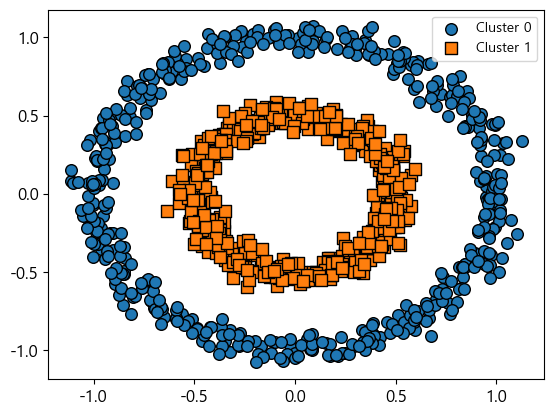

In [23]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0,
factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
print(np.unique(clusterDF['target']))

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

### KMeans 적용

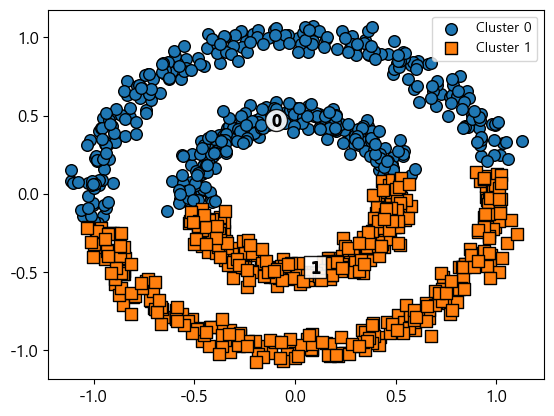

In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, max_iter = 1000, random_state=42)
kmeans_label = kmeans.fit_predict(X)

clusterDF['kmeans_cluster'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster',iscenter=True)

### GaussianMixture 적용

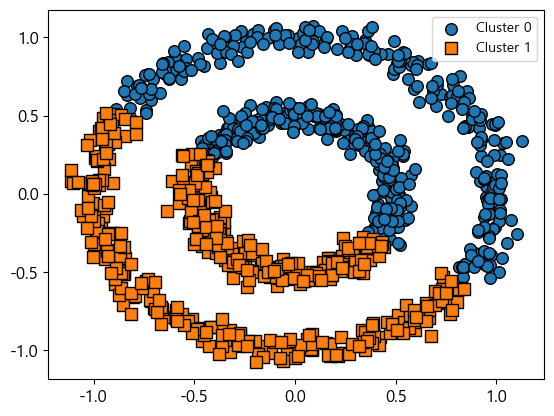

In [26]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label
# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정.
visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster',iscenter=False)

### DBSCAN 적용

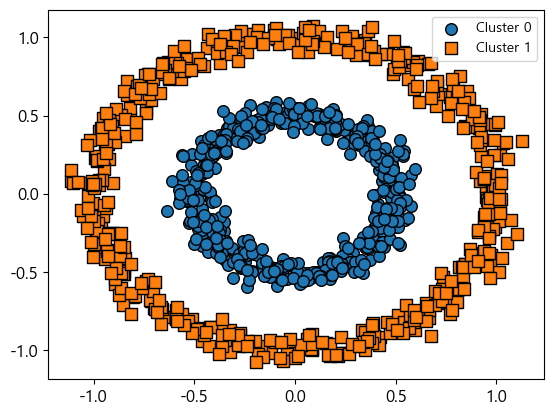

In [27]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.2, min_samples= 7)
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

### BIRCH

In [29]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data

from sklearn.cluster import Birch
brc = Birch(n_clusters= 3)
brc.fit(X)

Birch()

In [30]:
print(iris.target)
y_hat = brc.predict(X)
print(y_hat)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
